<a href="https://colab.research.google.com/github/yerinsally/BDA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0312_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필수과제 
- 대통령선거 데이터를 가지고 실제로 코사인 유사도를 계산했을 때 리뷰랑 비슷한 내용은 어떤 게 있는지 코드로 정리
- 이전 주차 과제 기반으로해서 동일하게 진행

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/[BDAA 5기] 데이터 분석 기초반/데이터셋/tweet_jae.csv')
data

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n..."
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,..."
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...
...,...,...,...,...
8561,1293704470996557824,QVh027,2020-08-13 00:22:36,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...
8562,1293706115528527873,hezii631,2020-08-13 00:29:08,인물열전] 이재명에게서 노무현을 보다…“진짜 민주주의를 향한 위대한 발걸음”\n온라...
8563,1293704734507859969,junsun88,2020-08-13 00:23:39,@Jaemyung_Lee 믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실...
8564,1293704250019549184,hjg002,2020-08-13 00:21:43,"뻐꾹이와 이재명, 김경수까지 변호를? 그 피데스 동지들이 법을 유린하고 있다 많이 ..."


In [3]:
# 결측치 확인
data.isna().sum()

status_id      0
screen_name    0
created_at     0
text           0
dtype: int64

In [4]:
# 한글만 남기고 모두 삭제
data['text'] = data['text'].str.replace(pat=r"[^ㄱ-ㅣ가-힣\s]", repl= r'', regex=True)
data

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것\n\n 이재명은 적...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,차기선호도 이재명 이낙연 첫 역전종합
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,안철수 시즌라ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이낙연 대세론 흔들이재명 여권 추락 속 ...
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군\n대통령과 당 지지율이 떨어졌는데\n이재명...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연\n당연히 이낙연 아닌가...
...,...,...,...,...
8561,1293704470996557824,QVh027,2020-08-13 00:22:36,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...
8562,1293706115528527873,hezii631,2020-08-13 00:29:08,인물열전 이재명에게서 노무현을 보다진짜 민주주의를 향한 위대한 발걸음\n온라인 \n...
8563,1293704734507859969,junsun88,2020-08-13 00:23:39,믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실거주가 아니면 못사게 ...
8564,1293704250019549184,hjg002,2020-08-13 00:21:43,뻐꾹이와 이재명 김경수까지 변호를 그 피데스 동지들이 법을 유린하고 있다 많이 배워...


In [5]:
# 문자 길이 컬럼 생성
data['length'] = data['text'].str.len()
data

,status_id,screen_name,created_at,text,length
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것\n\n 이재명은 적...,145
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,차기선호도 이재명 이낙연 첫 역전종합,21
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,안철수 시즌라ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이낙연 대세론 흔들이재명 여권 추락 속 ...,51
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군\n대통령과 당 지지율이 떨어졌는데\n이재명...,85
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연\n당연히 이낙연 아닌가...,58
...,...,...,...,...,...
8561,1293704470996557824,QVh027,2020-08-13 00:22:36,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...,159
8562,1293706115528527873,hezii631,2020-08-13 00:29:08,인물열전 이재명에게서 노무현을 보다진짜 민주주의를 향한 위대한 발걸음\n온라인 \n...,98
8563,1293704734507859969,junsun88,2020-08-13 00:23:39,믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실거주가 아니면 못사게 ...,54
8564,1293704250019549184,hjg002,2020-08-13 00:21:43,뻐꾹이와 이재명 김경수까지 변호를 그 피데스 동지들이 법을 유린하고 있다 많이 배워...,62


In [29]:
# 데이터 수가 너무 많아 조절함.
data = data.sort_values('length',ascending = False).head(80)
data

,status_id,screen_name,created_at,text,length
8280,1294105001292251137,freevie0312,2020-08-14 02:54:10,이재명 정치에 그닥 관심없고 모든사안에 어중간히 아는 사람들에게는 ...,168
1458,1295790699107893249,kkk79936323,2020-08-18 18:32:31,군대 다녀온 분들은 다 같은 얘기\n자기때가 더 힘들었고 빡세다\n\n지금 군대가 ...,164
8161,1294157543686586370,Haha84128560,2020-08-14 06:22:57,양주시 쯤 되시나 봅니다 ㅎ\n가끔씩 트럼프 대통령 에게도 \n영문으로 트윗...,164
8160,1293887298879119360,Haha84128560,2020-08-13 12:29:05,저런것도 박근혜 대통령 캠프 일 했다고\n자칭 정치평론가라니 \n말하는 수준...,164
1012,1293807310347804672,woori1987,2020-08-13 07:11:15,대선후보가 이낙연의원님 일 수 밖에ㅜ없는 이유\n\n아무리 역동적인 국민이더라...,164
...,...,...,...,...,...
4054,1295637817234616321,lalapesto,2020-08-18 08:25:02,이재명이나 그 새끼들 미국은 얼마 줬더라\n그 지랄하는데 락다운 상태에 그 돈 주고...,158
5030,1293947586227761152,coreadokdolover,2020-08-13 16:28:39,이재명과 이명박과 너무도 같다\n뱁새눈깔 찢어진 것도 같고\n기생충 기회주의자인것...,158
3062,1296448013729181696,primadonna70,2020-08-20 14:04:27,노통의 절친이자 동지인 김원웅회장님 앞에서\n문통의 잘못된 행보와\n조국과 친노친...,158
106,1294779459388628992,FATE_1221_,2020-08-15 23:34:13,이낙연 의원은 현재 총리도 아니고 당 대표도 아니고 국회의원 중 한 명일 뿐이다\n...,158


(array([18., 30., 11.,  4.,  3.,  9.,  4.,  0.,  0.,  1.]),
 array([158., 159., 160., 161., 162., 163., 164., 165., 166., 167., 168.]),
 <BarContainer object of 10 artists>)

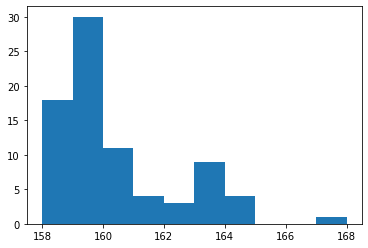

In [30]:
# 문자길이 시각화
import matplotlib.pyplot as plt
plt.hist(data['length'])

In [7]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 53.9 MB/s eta 0:00:00


In [8]:
import konlpy
konlpy.__version__

'0.6.0'

In [9]:
from konlpy.tag import Okt
from collections import Counter

In [31]:
# text 컬럼
text = pd.DataFrame(data['text'])
text

,text
8280,이재명 정치에 그닥 관심없고 모든사안에 어중간히 아는 사람들에게는 ...
1458,군대 다녀온 분들은 다 같은 얘기\n자기때가 더 힘들었고 빡세다\n\n지금 군대가 ...
8161,양주시 쯤 되시나 봅니다 ㅎ\n가끔씩 트럼프 대통령 에게도 \n영문으로 트윗...
8160,저런것도 박근혜 대통령 캠프 일 했다고\n자칭 정치평론가라니 \n말하는 수준...
1012,대선후보가 이낙연의원님 일 수 밖에ㅜ없는 이유\n\n아무리 역동적인 국민이더라...
...,...
4054,이재명이나 그 새끼들 미국은 얼마 줬더라\n그 지랄하는데 락다운 상태에 그 돈 주고...
5030,이재명과 이명박과 너무도 같다\n뱁새눈깔 찢어진 것도 같고\n기생충 기회주의자인것...
3062,노통의 절친이자 동지인 김원웅회장님 앞에서\n문통의 잘못된 행보와\n조국과 친노친...
106,이낙연 의원은 현재 총리도 아니고 당 대표도 아니고 국회의원 중 한 명일 뿐이다\n...


In [32]:
from konlpy.tag import Twitter
twt = Twitter()

/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [33]:
all_word = [] # 이 리스트에 명사 담기

for n in range(len(data)):
  text = data['text'].iloc[n]
  words = twt.pos(text)

  for i, j in words:
    if j == 'Noun':
      all_word.append(i)

In [34]:
# 단어의 빈도수를 집계하여 자주 등장한 단어 Top 10 추출
all_word_df = pd.DataFrame({'words':all_word, 'count':len(all_word)*[1]})
all_word_df = all_word_df.groupby('words').count()
all_word_df.sort_values('count', ascending=False).head(10)

,count
words,
이재명,118
것,48
국민,45
수,41
그,26
이,25
일,24
코로나,22
이낙연,18


In [35]:
all_word_df.sort_values('count', ascending=False).tail(10)

,count
words,
부처,1
북,1
북한,1
분리,1
분명,1
분석,1
분탕,1
불,1
불리,1


## 코사인 유사도

In [36]:
# count
all_word_df = pd.DataFrame({'words':all_word, 'count':len(all_word)*[1]})
all_word_df

,words,count
0,이재명,1
1,정치,1
2,그닥,1
3,관심,1
4,사안,1
...,...,...
2600,하나,1
2601,것,1
2602,나,1
2603,목표,1


In [37]:
all_word_df.groupby('words').sum()

,count
words,
가끔,1
가능성,2
가스,1
가습기,1
가입,1
...,...
후광,1
후보,15
휴대폰,1


In [38]:
# 불용어 처리
words_df_1 = all_word_df.groupby('words').sum()
words_df_1

,count
words,
가끔,1
가능성,2
가스,1
가습기,1
가입,1
...,...
후광,1
후보,15
휴대폰,1


In [39]:
words_df_1.sort_values('count',ascending = False).head(20)

,count
words,
이재명,118
것,48
국민,45
수,41
그,26
이,25
일,24
코로나,22
이낙연,18


In [40]:
# 카운트가 많이 나오는 걸 기준으로 데이터 추리기
words_df = words_df_1[words_df_1['count'] >= 3]
words_df

,count
words,
가짜,4
감,14
강,7
강원도,3
개념,5
...,...
해,3
해도,3
혈세,5


In [41]:
words_df.sort_values('count',ascending = False).head(20)

,count
words,
이재명,118
것,48
국민,45
수,41
그,26
이,25
일,24
코로나,22
이낙연,18


In [42]:
# 형태소 나눈 것을 하나의 데이터프레임으로 만들어서 값을 계산할 수 있게 만든다.
parts =['Noun']
all_words_df = pd.DataFrame()
for n in range(len(data)):
    text = data['text'].iloc[n]
    words = twt.pos(text)
    words_df = pd.DataFrame()
    for i in words:
        if i =='EOS' or i =='':continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        words_df[word_tmp]=[1] # 형태소로 나눈 것들은 다 1로 넣기
    all_words_df = pd.concat([all_words_df, words_df],ignore_index =True)

In [43]:
all_words_df = all_words_df.fillna(0)
all_words_df

,이재명,정치,그닥,관심,사안,사람,먼저,구호,사이다,생각,...,지선,남경필,실패,개판,정당,이념,나발,슈킹하,개새끼,목표
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# target 선정 : 원하는 타겟 값을 기준으로 변경 가능
data['text'].iloc[1]
target_text = all_words_df.iloc[1]

In [45]:
data['text'].iloc[1]

'군대 다녀온 분들은 다 같은 얘기\n자기때가 더 힘들었고 빡세다\n\n지금 군대가 아무리 편해졌다 해도\n개인주의 생활 익숙 요즘 세대는\n힘들다 느끼고 할 말 많고 \n\n군대도 예전처럼 강압적 방식 아닌\n휴대폰 허용등 신세대에 맞게 변화과정\n\n군대 경험 도 없이 다 아는듯  저딴 얘길 하는 이재명 황당'

In [46]:
print(target_text)

이재명    1.0
정치     0.0
그닥     0.0
관심     0.0
사안     0.0
      ... 
이념     0.0
나발     0.0
슈킹하    0.0
개새끼    0.0
목표     0.0
Name: 1, Length: 1030, dtype: float64


In [47]:
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
cos_text

이재명    1.0
정치     0.0
그닥     0.0
관심     0.0
사안     0.0
      ... 
이념     1.0
나발     1.0
슈킹하    1.0
개새끼    1.0
목표     1.0
Name: 79, Length: 1030, dtype: float64

In [48]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text)*np.linalg.norm(cos_text)) # 코사인 유사도 식 구글링
    cos_sim.append(cos)
    
all_words_df['cos_sim'] = cos_sim
all_words_df.sort_values('cos_sim',ascending=False).head()

,이재명,정치,그닥,관심,사안,사람,먼저,구호,사이다,생각,...,남경필,실패,개판,정당,이념,나발,슈킹하,개새끼,목표,cos_sim
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
38,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233550
25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127128
36,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125656
35,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114208


In [49]:
# 위의 결과값을 인덱스 기준으로 리뷰 유사도 비슷한 내용 확인 가능
print(data['text'].iloc[1])
print(data['text'].iloc[38])

군대 다녀온 분들은 다 같은 얘기
자기때가 더 힘들었고 빡세다

지금 군대가 아무리 편해졌다 해도
개인주의 생활 익숙 요즘 세대는
힘들다 느끼고 할 말 많고 

군대도 예전처럼 강압적 방식 아닌
휴대폰 허용등 신세대에 맞게 변화과정

군대 경험 도 없이 다 아는듯  저딴 얘길 하는 이재명 황당
   다른 분에게도 김부선 논란을 부추기는 말을 하니 이상하게 색각되었습니다 그래서 계정을 살펴볼 수 밖에 없는데 얘기들어보니 예전에 많이 봤던 릴위엔님이시네요 그런데 지금은 이재명 떠난 것 같은데요 이재명 트윗이 하나도 없고 정부  비판과 이재명 비판해던 사람들 트윗만 많이 보입니다
